In [1]:
import numpy as np


In [15]:
import numpy as np
from scipy.integrate import solve_ivp
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from pylab import *

In [8]:
def LV(time, current_state, R, w, g, l):
    
    theta = current_state[0]
    v = current_state[1]
    
    dtheta = v
    dv = (-R*w**2 )*(np.sin(theta-w*time) -(g/l)*np.sin(theta))
    
    return [dtheta, dv]

In [21]:
R= 1
w = 4/3
g = 9.8
l= 5
initial_conditions = [1,.1]
time = np.linspace(0,20,100)

Text(0.5, 0.5, 'theta')

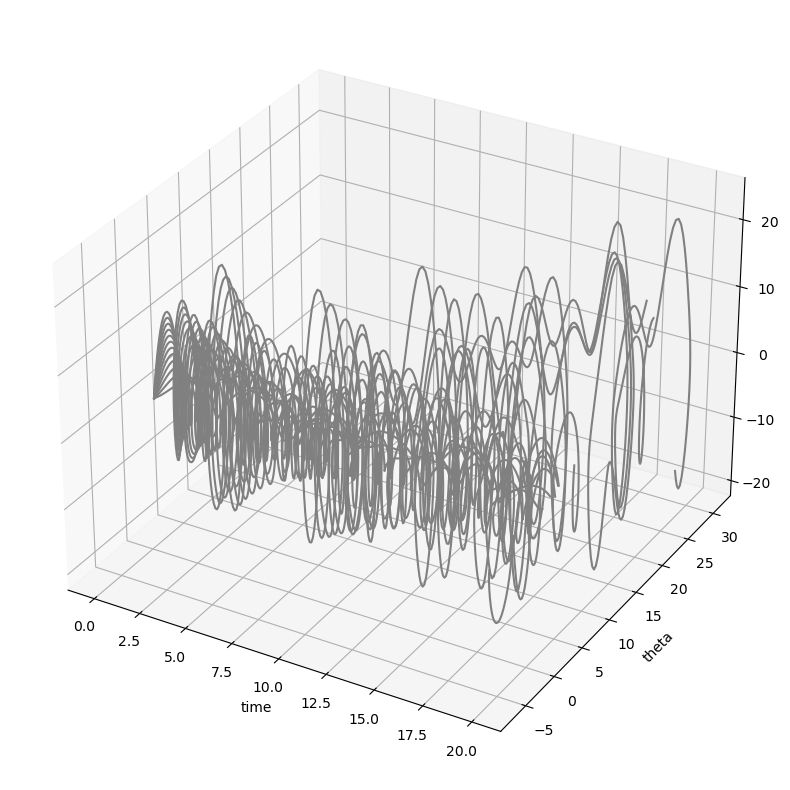

In [60]:
R= 2
w = 4/3
g = 9.8
l= 5
plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure()
ax = plt.axes(projection='3d')
w_values=np.linspace(1,5,12)
for i in w_values:
    w=i
    result = solve_ivp(LV, (0,20),initial_conditions, t_eval = time, args=(R, w, g, l))
    theta = result.y[0,:]
    v = result.y[1,:]
    ax.plot3D( time,theta,v,'gray')

plt.xlabel('time')
plt.ylabel('theta')

In [64]:
# constraint force:

theta=np.arange(0,5*np.pi,0.01)
def f(m,g,R,theta):
    fr=m*g*np.cos(theta)-(m*g/R)*np.cos(theta)**2
    return fr

fr=f(2,9.8,5,theta)

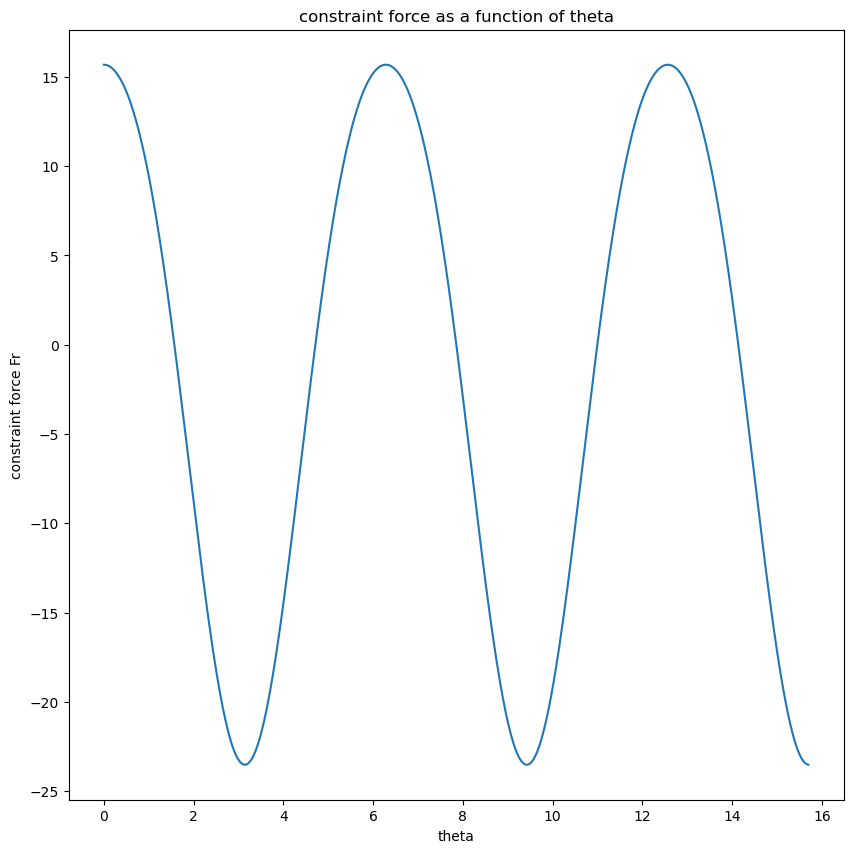

In [66]:
plt.plot(theta,fr)
plt.xlabel('theta')
plt.ylabel('constraint force Fr')
plt.title('constraint force as a function of theta')
plt.show()

In [86]:
# schrodinger:
# E in ev
# length in nm
#hc=1240 ev
# hbar-c use 197 ev* nm
# mass in mc^2. mass of electron =511000
a=1 # length of well
U=0 # potential inside the well
# k=1 is equal to 2m/hbar^2 
m=511000
hbc=197
k=2*m/hbc**2

E=2
dE=0.01
psi=0
psidot=1
psiddot=-k*psi*E


x=0
dx=0.001

psip=[]
xp=[]
psifinal=1
     

E= 0.38000000000000017 ev


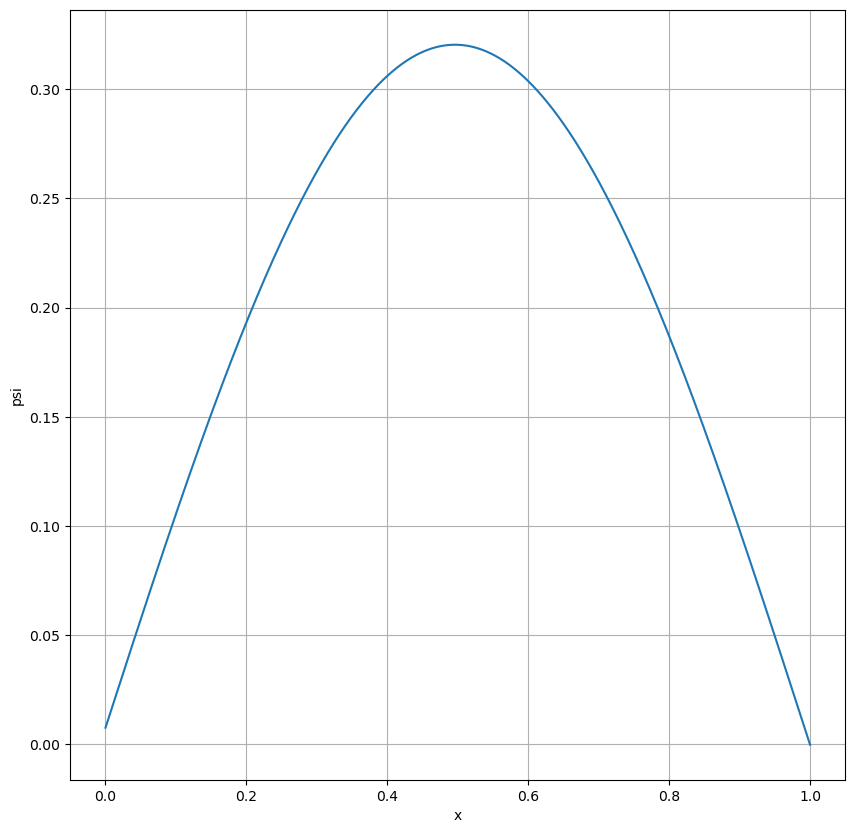

In [89]:

a=1 
U=0 
m=511000
hbc=197
k=2*m/hbc**2

E=0
dE=0.01
psi=0
psidot=1
psiddot=-k*psi*E


x=0
dx=0.001

psip=[]
xp=[]
psifinal=1
while np.abs(psifinal)>0.002:
    x=0
    psidot=1
    psip=[]
    xp=[]
    
    while x<a:
        psiddot= -k*psi*E
        psidot=psidot+psiddot*dx
        psi=psi+psidot*dx
        x=x+dx
        psip=psip+[psi]
        xp=xp+[x]
        
    psifinal=psi
    E=E+dE
    
print('E=',E,'ev')
plt.plot(xp,psip)
plt.xlabel('x')
plt.ylabel('psi')
plt.grid()
plt.show()
    
  



In [95]:
area=0
for i in range(len(psip)-1):
    dA=(psip[i]**2)*dx
    area=area+dA

print('Area = ', area)
new_psip=psip/np.sqrt(area)
psip=new_psip

Area =  0.05166507068269376


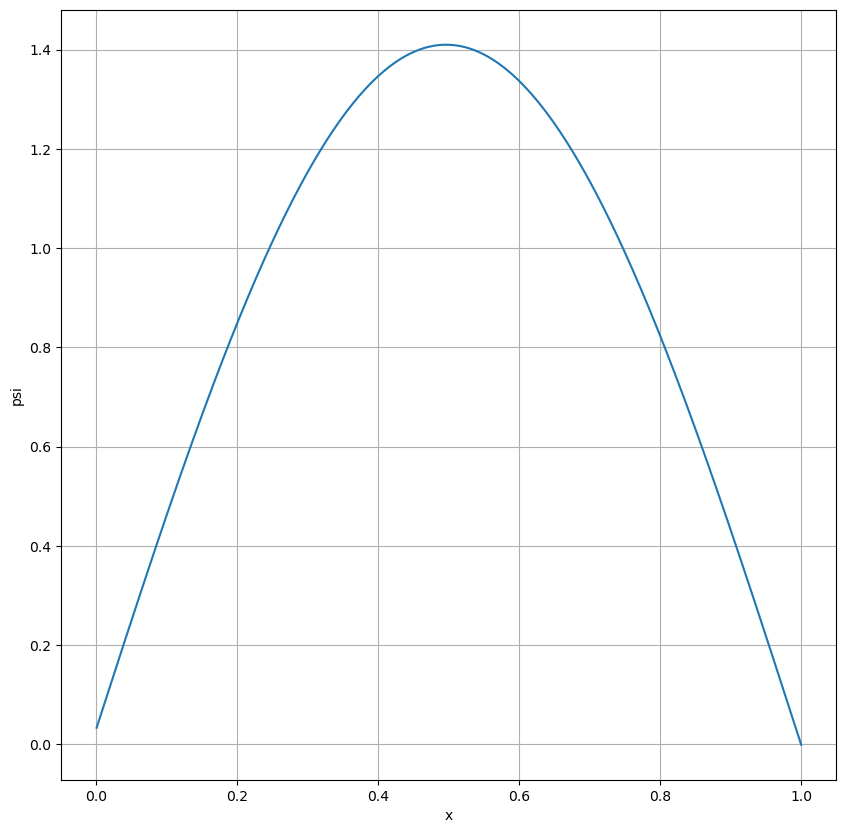

In [96]:

plt.plot(xp,psip)
plt.xlabel('x')
plt.ylabel('psi')
plt.grid()
plt.show()
    
  




what we notice:
we notice that as we are changing the energy E, our function keeps on changing ocourse. We want our function to meet our expectation, that is at x=a which is 1 here, the wave function should go all the way down to zero. to do that we need to keep on varaying E until we get the right answer.

what is still missing is that our answer is not normalized.

so what we have done is that we divided by the area so that we got a normalized wave function, and then plot the wave.